In [29]:
#|default_exp app

In [24]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

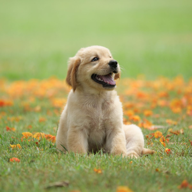

In [13]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [14]:
#|export
learn = load_learner('model.pkl')

In [17]:
learn.predict('dog.jpg')

('False', TensorBase(0), TensorBase([9.9991e-01, 9.4885e-05]))

In [18]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [20]:
classify_image('dog.jpg')

{'Dog': 0.9999051094055176, 'Cat': 9.488548676017672e-05}

In [23]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [26]:
from nbdev.export import nb_export

In [33]:
nb_export('app.ipynb', '')